In [124]:
import pyvisa

In [125]:
rm = pyvisa.ResourceManager()

In [126]:
rm.list_resources()

('ASRL1::INSTR', 'ASRL10::INSTR')

In [127]:
pippo = rm.open_resource("tcpip0::192.168.40.10::inst0::INSTR")

In [128]:
print(pippo.query('*IDN?'))

Keysight Technologies,N9916A,MY53104702,A.08.01



In [129]:
#percentuale batteria (sbagliato) (però 100% dà sempre 70)
print(pippo.query('SYST:BATT:ABSC?'))

41



# vna: vector network analyzer
# psa: power spectrum analyzer
TONO:SINUSOIDE
arrivano in ingresso frequenze



---

settiamo una freq min e una max
misuriamo s21: forward trasmition - segnale trasmesso
quello che vediamo è in dB

In [130]:
pluto = pippo.query('INST:SEL?')
pluto

'"NA"\n'

In [131]:
#imposta su VNA. Per Spectrum analyzer fare "SA"
pippo.query('INST:SEL "NA";*OPC?')

'1\n'

In [132]:

pippo.query('CALC:PAR1:DEF S21;*OPC?')
# NON VA
# pippo.query('CALC:PAR1:SEL;*OPC?')
# pippo.query('DISP:WIND:TRAC1:Y:AUTO;*OPC?')

'1\n'

In [133]:
import matplotlib.pyplot as plt
import numpy as np

In [134]:
pippo.query('CALC:FORM?')
pluto = pippo.query('TRACE:DATA? SDATA') #pag 767
# lista di parte reale e parte immaginaria alternati
pluto = list(map(float, pluto.strip('\n').split(','))) 
len(pluto)

402

Text(0, 0.5, 'dB')

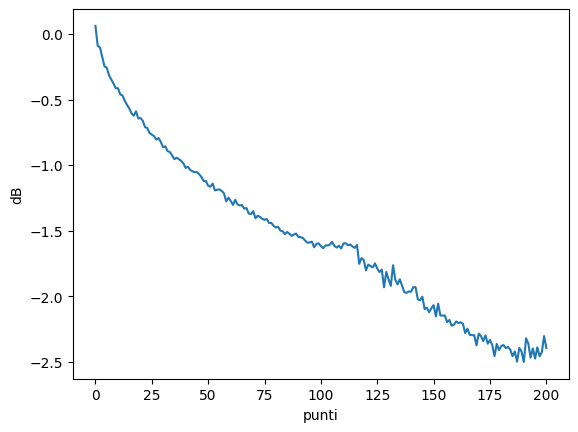

In [135]:
b = np.array(pluto[::2]) # parte imm
a = np.array(pluto[1::2]) # parte reale

#c = np.sqrt(np.array(a)**2+np.array(b)**2)
c= np.abs(a+1j*b)

# conversione in db 


c_dB = 20*np.log10(c)
plt.plot(c_dB)
min(c_dB)

# naming the x axis 
plt.xlabel('punti') 
# naming the y axis 
plt.ylabel('dB')


In [136]:

#mlog =

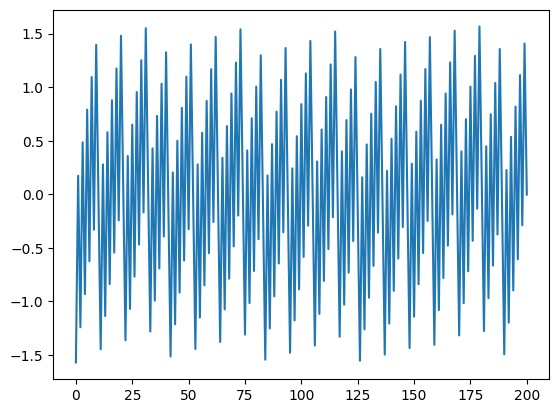

In [137]:
phase = np.arctan(b/a) 
plt.plot(np.unwrap(phase))

In [138]:
inietto = pippo.query('FREQ:DATA?')
inietto = list(map(float, inietto.strip('\n').split(',')))
inietto

[30000.0,
 70029850.0,
 140029700.0,
 210029550.0,
 280029400.0,
 350029250.0,
 420029100.0,
 490028950.0,
 560028800.0,
 630028650.0,
 700028500.0,
 770028350.0,
 840028200.0,
 910028050.0,
 980027900.0,
 1050027750.0,
 1120027600.0,
 1190027450.0,
 1260027300.0,
 1330027150.0,
 1400027000.0,
 1470026850.0,
 1540026700.0,
 1610026550.0,
 1680026400.0,
 1750026250.0,
 1820026100.0,
 1890025950.0,
 1960025800.0,
 2030025650.0,
 2100025500.0,
 2170025350.0,
 2240025200.0,
 2310025050.0,
 2380024900.0,
 2450024750.0,
 2520024600.0,
 2590024450.0,
 2660024300.0,
 2730024150.0,
 2800024000.0,
 2870023850.0,
 2940023700.0,
 3010023550.0,
 3080023400.0,
 3150023250.0,
 3220023100.0,
 3290022950.0,
 3360022800.0,
 3430022650.0,
 3500022500.0,
 3570022350.0,
 3640022200.0,
 3710022050.0,
 3780021900.0,
 3850021750.0,
 3920021600.0,
 3990021450.0,
 4060021300.0,
 4130021150.0,
 4200021000.0,
 4270020850.0,
 4340020700.0,
 4410020550.0,
 4480020400.0,
 4550020250.0,
 4620020100.0,
 4690019950.0,


Text(0.5, 1.0, 'S21')

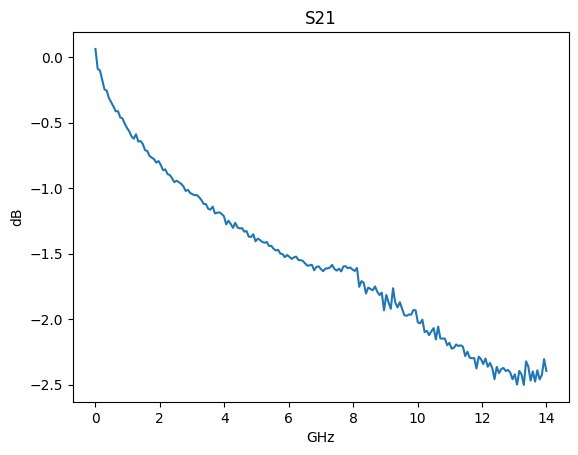

In [139]:
freqs = np.array(inietto)/1e9
plt.plot(freqs, c_dB)

# naming the x axis 
plt.xlabel('GHz') 
# naming the y axis 
plt.ylabel('dB')

# giving a title to my graph 
plt.title('S21')

In [142]:
pippo.query('FREQ:START ' + str(4e9)+ ';*OPC?')   #set freq iniziale
pippo.query('FREQ:STOP ' + str(8e9)+ ';*OPC?')

'1\n'

In [ ]:
def get_data(fmin, fmax):
    


    return f, I, Q


